In [1]:
import pandas as pd 
df = pd.read_csv("data_statreg.csv") 
df.head() 

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
1,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
2,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
3,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
4,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866


In [2]:
#Memodelkan dengan Regresi Linier Berganda
import numpy as np 
import statsmodels.api as sm 
x = df[['x1','x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']] 
y = df['y'] 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print_model = model.summary() 
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     8.846
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           5.30e-05
Time:                        13:39:16   Log-Likelihood:                -50.468
No. Observations:                  28   AIC:                             120.9
Df Residuals:                      18   BIC:                             134.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2919     12.813     -0.569      0.5

In [5]:
prediksi = model.predict(x) 
print(prediksi.head()) 

0     7.021545
1     9.879878
2     8.719891
3    10.792301
4    10.191417
dtype: float64


In [6]:
residual=model.resid 
print(residual.head()) 

0    2.978455
1    1.120122
2    2.280109
3    2.207699
4   -0.191417
dtype: float64


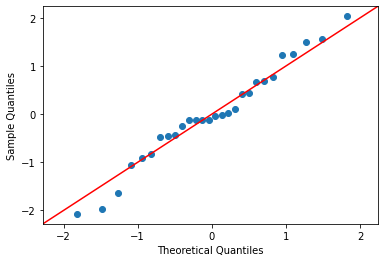

In [10]:
#Menggambar Plot QQ menggunakan package statmodels
import scipy.stats as stats 
import matplotlib.pyplot as plt
fig = sm.qqplot(residual, stats.t, fit=True, line="45") 
plt.show() 


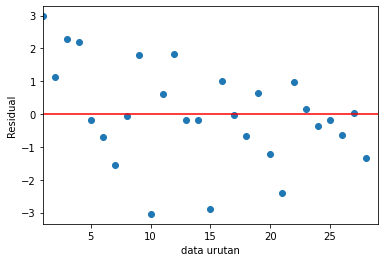

In [25]:
#Plot memeriks asumsi residual tidak terjadi autokorelasi
urutan_pengamatan=pd.Series(range(1,29)) 
plt.scatter(urutan_pengamatan, residual); 
plt.axhline(0, color='red') 
plt.xlabel('data urutan'); 
plt.ylabel('Residual'); 
plt.xlim([1,29]); 

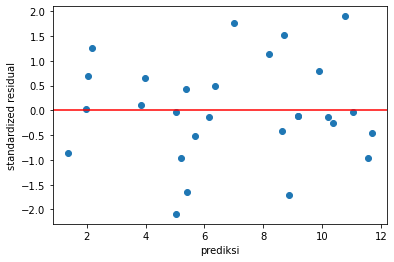

In [26]:
#Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence() 
#menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual); 
plt.axhline(0, color='red') 
plt.xlabel('prediksi'); 
plt.ylabel('standardized residual'); 

In [19]:
#Pengujian Jarque Bera untuk memeriksa asumsi residual
from statsmodels.compat import lzip 
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms  
name = ["Jarque-Bera", "Chi^2 twotail prob.", "Skew", "Kurtosis"] 
test = sms.jarque_bera(model.resid) 
lzip(name, test)

[('Jarque-Bera', 0.142611130165314),
 ('Chi^2 two\x02tail prob.', 0.931177313378411),
 ('Skew', -0.1181500374692782),
 ('Kurtosis', 2.742317276181926)]

In [20]:
#Pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson 
dw = durbin_watson(model.resid) 
print(f"Durbin-Watson: {dw}") 

Durbin-Watson: 1.74642082029883


In [21]:
#Pengujian Breush-Pagan
from statsmodels.compat import lzip 
import statsmodels.stats.api as sms 
names = ['Lagrange multiplier statistic', 'p-value', 
 'f-value', 'f p-value'] 
test = sms.het_breuschpagan(model.resid, model.model.
exog) 
lzip(names, test) 

[('Lagrange multiplier statistic', 11.011341849276477),
 ('p-value', 0.2749323117077412),
 ('f-value', 1.29631684287055),
 ('f p-value', 0.30449830576491715)]